In [42]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#Reading the csv dataset

df = pd.read_csv("SampleSuperstore (1).csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#Checking for missing values

df.isnull().sum()

#No missing values so we can proceed

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#Understanding our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#Understanding our dataset

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:title={'center':'Quantity of different categories of products sold'}, xlabel='Category'>

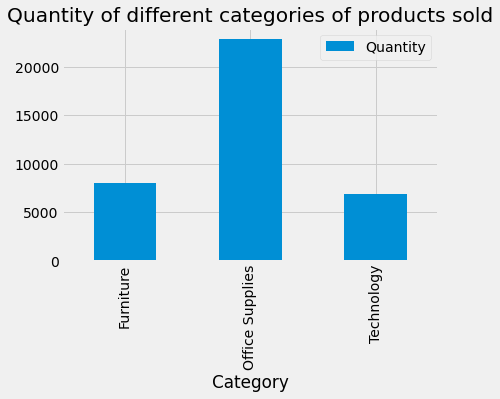

In [12]:
#Qualities Of Products sold & type of visualization needed

plt.style.use("fivethirtyeight")

Products_sold = df.groupby("Sub-Category").agg({"Quantity": "sum"}).sort_values(by = "Quantity", ascending = False)
Categories_sold = df.groupby("Category").agg({"Quantity": "sum"})
Categories_sold.plot(kind = "bar", title = "Quantity of different categories of products sold")

<AxesSubplot:title={'center':'Quantity of products sold'}, xlabel='Sub-Category'>

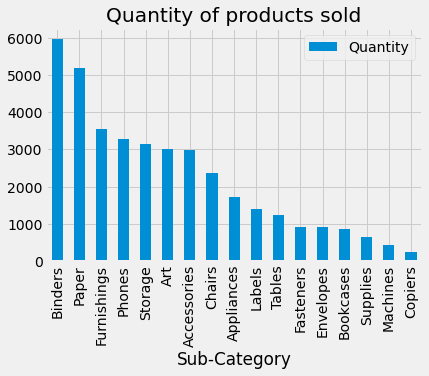

In [13]:
Products_sold.plot(kind = "bar", title = "Quantity of products sold")

<AxesSubplot:title={'center':'Sales of each Category'}, xlabel='Category'>

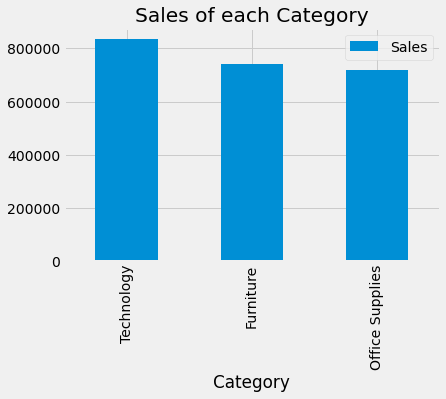

In [19]:
#Category sales & Sub category sales

Categories_sold = df.groupby("Category").agg({"Sales": "sum"}).sort_values(by = "Sales", ascending = False)
Categories_sold.plot(kind = "bar", title = "Sales of each Category")

<AxesSubplot:title={'center':'Sales of each Sub-Category'}, xlabel='Sub-Category'>

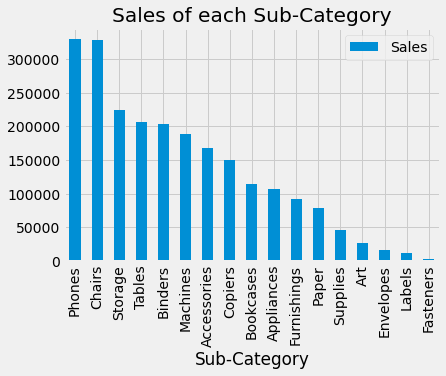

In [23]:
Products_sold = df.groupby("Sub-Category").agg({"Sales": "sum"}).sort_values(by = "Sales", ascending = False)
Products_sold.plot(kind = "bar", title = "Sales of each Sub-Category")

<AxesSubplot:title={'center':'Profits from each Sub-Category'}, xlabel='Sub-Category'>

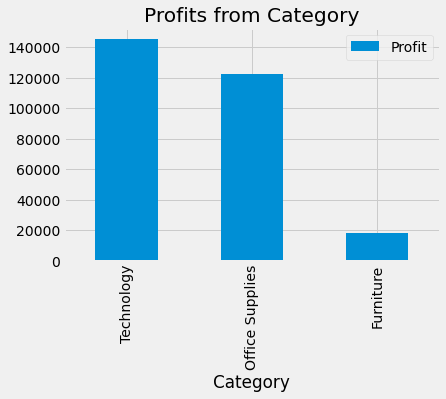

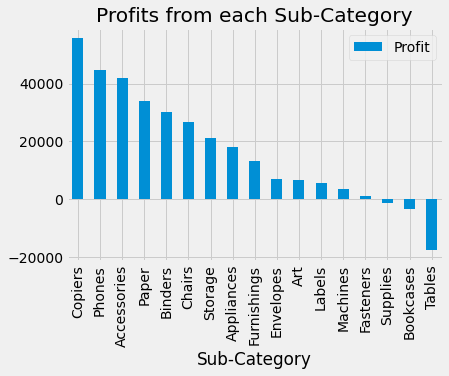

In [28]:
#Profits from the categories & Subcategories
Cat_profits = df.groupby("Category").agg({"Profit": "sum"}).sort_values(by = "Profit", ascending = False)
Prod_profits = df.groupby("Sub-Category").agg({"Profit": "sum"}).sort_values(by = "Profit", ascending = False)
Cat_profits.plot(kind = "bar", title = "Profits from Category")
Prod_profits.plot(kind = "bar", title = "Profits from each Sub-Category")

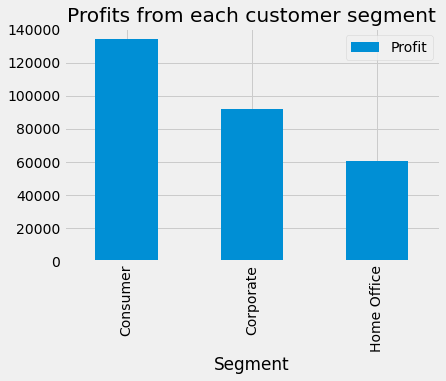

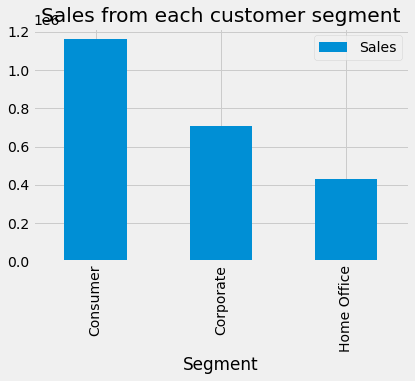

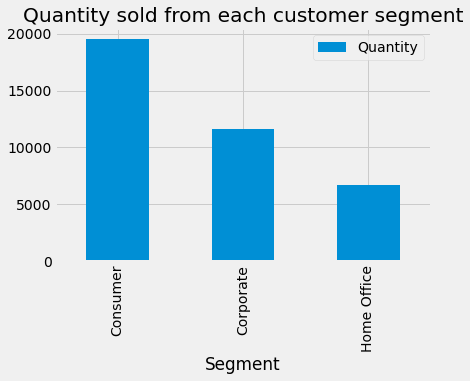

In [39]:
#Analysis of sales, profits and quality sold by segment

#Profit Segment

Profit_segment = pd.DataFrame(df.groupby(["Segment"]).sum()["Profit"])
Profit_segment.sort_values(by = "Profit", inplace = True, ascending = False)

#Sales Segment

Sales_segment = pd.DataFrame(df.groupby(["Segment"]).sum()["Sales"])
Sales_segment.sort_values(by = "Sales", inplace = True, ascending = False)

#Quantity Segment

Quantity_segment = pd.DataFrame(df.groupby(["Segment"]).sum()["Quantity"])
Quantity_segment.sort_values(by = "Quantity", inplace = True, ascending = False)

Profit_segment.plot(kind = "bar", title = "Profits from each customer segment")
Sales_segment.plot(kind = "bar", title = "Sales from each customer segment")
Quantity_segment.plot(kind = "bar", title = "Quantity sold from each customer segment")

In [41]:
#Analysis of sales, profits and quantity sold by states

state_group = df.groupby(["State"])["Sales", "Quantity", "Profit"].mean().reset_index()

sorted_sales = state_group.sort_values(["Sales"], ascending = False)[:10]

sorted_quantity = state_group.sort_values(["Quantity"], ascending = False)[:10]

Sorted_profit = state_group.sort_values(["Profit"], ascending = False)[:10]

<ipython-input-41-44d363672c12>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_group = df.groupby(["State"])["Sales", "Quantity", "Profit"].mean().reset_index()


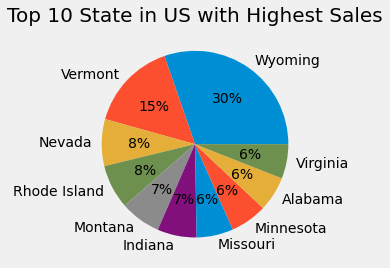

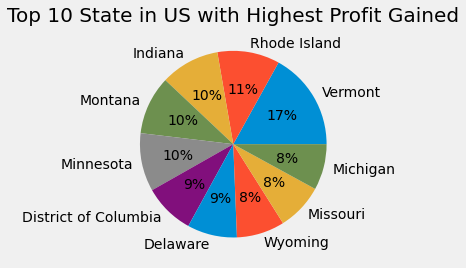

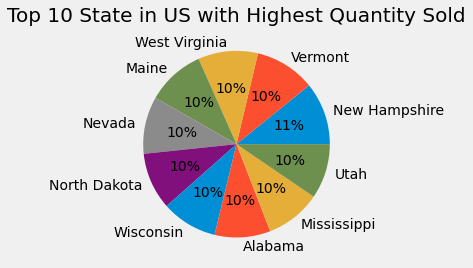

In [47]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = Sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = Sorted_profit.State

plt.pie(sales_values, labels = sales_labels, autopct = "%1.f%%")
plt.title("Top 10 State in US with Highest Sales", fontsize = 20)
plt.show()

plt.pie(profit_values, labels = profit_labels, autopct = "%1.f%%")
plt.title("Top 10 State in US with Highest Profit Gained", fontsize = 20)
plt.show()

plt.pie(quantity_values, labels = quantity_labels, autopct = "%1.f%%")
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize = 20)
plt.show()

In [49]:
#Analysis of sales, profit and quantity by Region
region_group = df.groupby(["Region"])["Sales", "Quantity", "Profit"].mean().reset_index()

sorted_sales1 = region_group.sort_values(["Sales"], ascending = False)

sorted_quantity2 = region_group.sort_values(["Quantity"], ascending = False)

sorted_profit3 = region_group.sort_values(["Profit"], ascending = False)

<ipython-input-49-dc932d50b45c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_group = df.groupby(["Region"])["Sales", "Quantity", "Profit"].mean().reset_index()


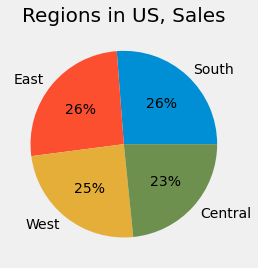

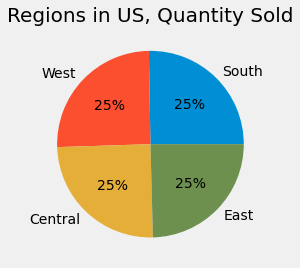

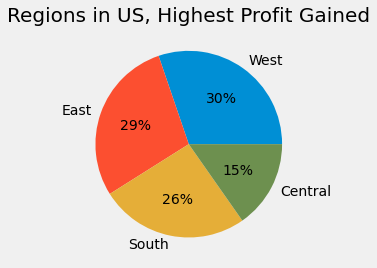

In [50]:
sales_values = sorted_sales1.Sales
quantity_values = sorted_quantity2.Quantity
profit_values = sorted_profit3.Profit

sales_labels = sorted_sales1.Region
quantity_labels = sorted_quantity2.Region
profit_labels = sorted_profit3.Region

plt.pie(sales_values, labels = sales_labels, autopct = "%1.f%%")
plt.title("Regions in US, Sales", fontsize = 20)
plt.show()


plt.pie(quantity_values, labels = quantity_labels, autopct = "%1.f%%")
plt.title("Regions in US, Quantity Sold", fontsize = 20)
plt.show()

plt.pie(profit_values, labels = profit_labels, autopct = "%1.f%%")
plt.title("Regions in US, Highest Profit Gained", fontsize = 20)
plt.show()

In [53]:
shipmode_group = df.groupby(["Ship Mode"])["Sales", "Quantity", "Profit"].mean().reset_index()

<ipython-input-53-ee0e35262e3a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shipmode_group = df.groupby(["Ship Mode"])["Sales", "Quantity", "Profit"].mean().reset_index()


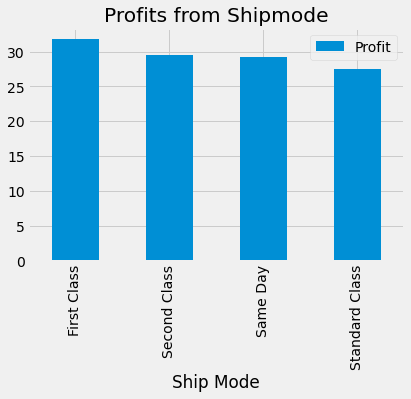

                     Sales
Ship Mode                 
Same Day        236.396179
Second Class    236.089239
First Class     228.497024
Standard Class  227.583067


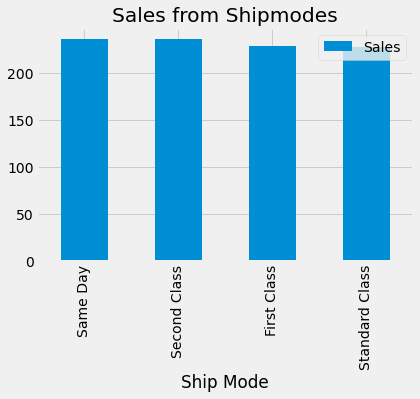

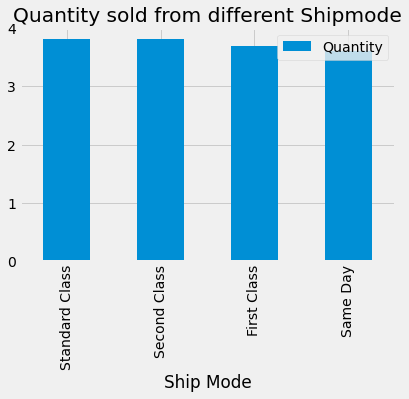

In [56]:
profit_sm = pd.DataFrame(df.groupby(['Ship Mode']).mean()['Profit'])
profit_sm.sort_values(by=['Profit'], inplace = True, ascending = False)
profit_sm.plot(kind="bar",title="Profits from Shipmode")
plt.show()

sales_sm = pd.DataFrame(df.groupby(['Ship Mode']).mean()['Sales'])
sales_sm.sort_values(by=['Sales'], inplace = True, ascending = False)
print(sales_sm)
sales_sm.plot(kind="bar",title="Sales from Shipmodes")
plt.show()

quantity_sm = pd.DataFrame(df.groupby(['Ship Mode']).mean()['Quantity'])
quantity_sm.sort_values(by=['Quantity'], inplace = True, ascending = False)
quantity_sm.plot(kind="bar",title="Quantity sold from different Shipmode")
plt.show()